# 트레이닝된 모든 모델들 submission_171118.csv 
* 2.57497 on kaggle


# 가장 퍼포먼스 좋은 아이 submission_20171119_0038.csv 
* 2.25358 on kaggle

# 앙상블에서 퍼포먼스 좋은 애들 뽑아서 submission_171119.csv 
* 2.14311 on kaggle


# opencv로 얼굴을 찾아서 해보자



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from K.utils.load import load_test_data
from K.utils.models import load_models_with_weights
import pandas as pd
import time
from K.utils.constant import *
from pandas.io.parsers import read_csv
import datetime as dt

/Users/sanghapark/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.
/Users/sanghapark/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
model_name = 'model_20171117_1723'

In [3]:
X_test = load_test_data('./data/test.csv')

In [4]:
model = np.array(load_models_with_weights(model_name))

In [5]:

# 퍼포먼스 좋은 애들 뽑은 애들
# cnn01_ids_to_use = [0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19] 
# cnn02_ids_to_use = [0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 15, 18, 21, 22, 25, 27, 29]

# 각 서브모델에서 가장 퍼포먼스 좋은 아이
cnn01_ids_to_use = [4] 
cnn02_ids_to_use = [25]


In [6]:
Y_hat01, Y_hat02 = np.zeros((X_test.shape[0], 8)), np.zeros((X_test.shape[0], 22))
for submodel in model:
    for idx, cnn in enumerate(submodel):
        Y_hat = cnn.predict(X_test)
        if Y_hat.shape[1] == 8:
            if idx in cnn01_ids_to_use:
                Y_hat01 += Y_hat
        elif Y_hat.shape[1] == 22:
            if idx in cnn02_ids_to_use:
                Y_hat02 += Y_hat

Y_hat01.shape, Y_hat02.shape

((1783, 8), (1783, 22))

In [7]:
if model[0][0].outputs[0].shape[1] == 8:
    Y_hat01 = Y_hat01 / len(cnn01_ids_to_use)
if model[1][0].outputs[0].shape[1] == 22:
    Y_hat02 = Y_hat02 / len(cnn02_ids_to_use)

In [8]:
Y_hat01 = Y_hat01 * 48 + 48
Y_hat02 = Y_hat02 * 48 + 48

In [9]:
cols01 = [
    'left_eye_center_x',            'left_eye_center_y',
    'right_eye_center_x',           'right_eye_center_y',
    'nose_tip_x',                   'nose_tip_y',
    'mouth_center_bottom_lip_x',    'mouth_center_bottom_lip_y'
]
cols02 = [

    'left_eye_inner_corner_x',      'left_eye_inner_corner_y',
    'left_eye_outer_corner_x',      'left_eye_outer_corner_y',
    'right_eye_inner_corner_x',     'right_eye_inner_corner_y',
    'right_eye_outer_corner_x',     'right_eye_outer_corner_y',
    'left_eyebrow_inner_end_x',     'left_eyebrow_inner_end_y',
    'left_eyebrow_outer_end_x',     'left_eyebrow_outer_end_y',
    'right_eyebrow_inner_end_x',    'right_eyebrow_inner_end_y',
    'right_eyebrow_outer_end_x',    'right_eyebrow_outer_end_y',

    'mouth_left_corner_x',          'mouth_left_corner_y',
    'mouth_right_corner_x',         'mouth_right_corner_y',
    'mouth_center_top_lip_x',       'mouth_center_top_lip_y'
]

In [10]:
df01 = pd.DataFrame(Y_hat01, columns=cols01)
df02 = pd.DataFrame(Y_hat02, columns=cols02)

In [11]:
df_merged = pd.concat([df01, df02], axis=1)
df_merged.tail()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,nose_tip_x,nose_tip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,left_eye_inner_corner_x,left_eye_inner_corner_y,...,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y
1778,66.295921,39.627128,31.371992,36.205361,48.292176,66.177036,46.410263,76.520837,58.106576,38.718521,...,40.576892,29.782004,16.671807,32.067601,61.657422,76.495368,32.168550,75.562140,46.622219,72.854310
1779,63.902382,35.436447,28.858578,41.049718,49.685053,65.001630,52.407086,75.815586,57.403596,37.325855,...,37.833066,33.695809,15.703134,36.812208,68.716330,68.690251,36.491390,73.792763,52.757345,70.607132
1780,67.681855,41.845785,32.175808,37.271309,47.383962,67.637535,45.421912,78.395382,60.495604,40.030874,...,41.602676,31.608768,20.019424,29.750957,60.354901,78.016439,31.167512,75.741079,46.280310,74.966103
1781,63.665577,38.117123,30.018250,38.743303,43.502913,63.019150,45.265353,74.810108,57.588273,38.771620,...,36.509268,30.738376,16.272014,33.073331,64.302173,75.136007,31.523621,76.137926,46.426323,73.030818
1782,68.986808,39.647687,30.808720,37.976008,48.029792,66.627143,47.687777,80.653570,60.444456,39.919791,...,39.820654,32.348150,17.786556,33.200781,63.977812,80.103822,32.514227,79.920462,47.643413,76.966610


In [12]:
keypoints = [
    'left_eye_center_x', 'left_eye_center_y',
    'right_eye_center_x', 'right_eye_center_y',
    'left_eye_inner_corner_x', 'left_eye_inner_corner_y',
    'left_eye_outer_corner_x', 'left_eye_outer_corner_y',
    'right_eye_inner_corner_x', 'right_eye_inner_corner_y',
    'right_eye_outer_corner_x', 'right_eye_outer_corner_y',
    'left_eyebrow_inner_end_x', 'left_eyebrow_inner_end_y',
    'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_y',
    'right_eyebrow_inner_end_x', 'right_eyebrow_inner_end_y',
    'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_y',
    'nose_tip_x', 'nose_tip_y',
    'mouth_left_corner_x', 'mouth_left_corner_y',
    'mouth_right_corner_x', 'mouth_right_corner_y',
    'mouth_center_top_lip_x', 'mouth_center_top_lip_y',
    'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y'
]

INDEXSTRING_30 = {'left_eye_center_x': 0, 'left_eye_center_y': 1,
                  'right_eye_center_x': 2, 'right_eye_center_y': 3,
                  'left_eye_inner_corner_x': 4, 'left_eye_inner_corner_y': 5,
                  'left_eye_outer_corner_x': 6, 'left_eye_outer_corner_y': 7,
                  'right_eye_inner_corner_x': 8, 'right_eye_inner_corner_y': 9,
                  'right_eye_outer_corner_x': 10, 'right_eye_outer_corner_y': 11,
                  'left_eyebrow_inner_end_x': 12, 'left_eyebrow_inner_end_y': 13,
                  'left_eyebrow_outer_end_x': 14, 'left_eyebrow_outer_end_y': 15,
                  'right_eyebrow_inner_end_x': 16, 'right_eyebrow_inner_end_y': 17,
                  'right_eyebrow_outer_end_x': 18, 'right_eyebrow_outer_end_y': 19,
                  'nose_tip_x': 20, 'nose_tip_y': 21,
                  'mouth_left_corner_x': 22, 'mouth_left_corner_y': 23,
                  'mouth_right_corner_x': 24, 'mouth_right_corner_y': 25,
                  'mouth_center_top_lip_x': 26, 'mouth_center_top_lip_y': 27,
                  'mouth_center_bottom_lip_x': 28, 'mouth_center_bottom_lip_y': 29}

In [13]:
df_merged = df_merged[keypoints]

In [14]:
df_merged.tail()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
1778,66.295921,39.627128,31.371992,36.205361,58.106576,38.718521,72.337875,39.501181,37.036069,37.949445,...,48.292176,66.177036,61.657422,76.495368,32.168550,75.562140,46.622219,72.854310,46.410263,76.520837
1779,63.902382,35.436447,28.858578,41.049718,57.403596,37.325855,71.079080,34.784514,36.782327,40.653768,...,49.685053,65.001630,68.716330,68.690251,36.491390,73.792763,52.757345,70.607132,52.407086,75.815586
1780,67.681855,41.845785,32.175808,37.271309,60.495604,40.030874,73.080972,41.179544,37.980912,38.345197,...,47.383962,67.637535,60.354901,78.016439,31.167512,75.741079,46.280310,74.966103,45.421912,78.395382
1781,63.665577,38.117123,30.018250,38.743303,57.588273,38.771620,72.348504,38.591409,35.633161,39.531868,...,43.502913,63.019150,64.302173,75.136007,31.523621,76.137926,46.426323,73.030818,45.265353,74.810108
1782,68.986808,39.647687,30.808720,37.976008,60.444456,39.919791,74.026317,40.209348,37.091860,39.686366,...,48.029792,66.627143,63.977812,80.103822,32.514227,79.920462,47.643413,76.966610,47.687777,80.653570


In [15]:
df_merged.values.shape

(1783, 30)

In [16]:
reader = read_csv('./data/IdLookUpTable.csv')

In [17]:
grouped = reader.groupby('ImageId')
values = []

In [18]:
def loop(values, group, df):
    for index, row in group.iterrows():
        values.append((df[int(row['ImageId']) - 1]
                           [INDEXSTRING_30[row['FeatureName']]]))
    return values

In [19]:
for name, group in grouped:
    loop(values, group, df_merged.values)

In [20]:
datetime = dt.datetime.now().strftime("%Y%m%d_%H%M")
filename = 'submission_' + datetime + '.csv'
submission = pd.DataFrame({'Location': values})
submission.index += 1
submission.to_csv(filename, index_label='RowId')

# 위에 방법으로 submission_171118.csv 
# 2.57497 on kaggle
* 이제 가장 퍼포먼스가 좋았던 애들로 뽑아서 다시 구성해서 해보자

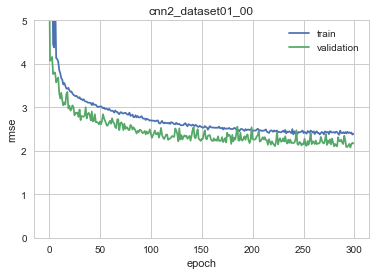

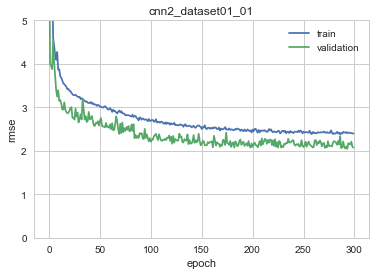

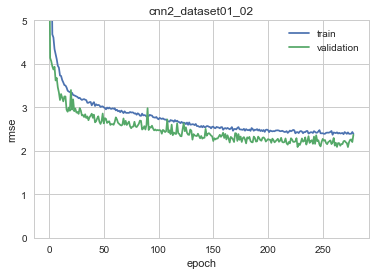

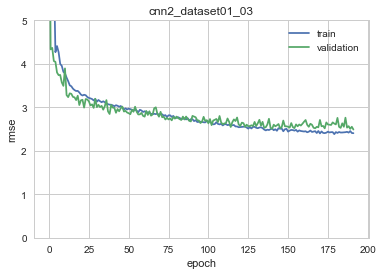

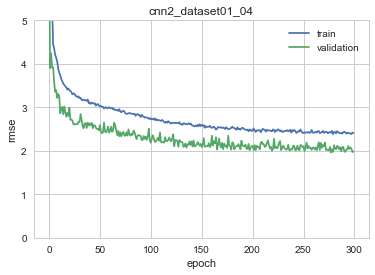

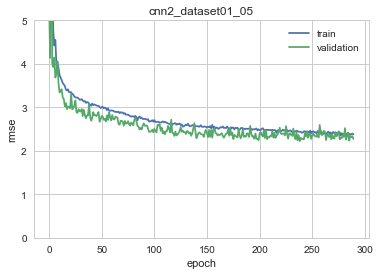

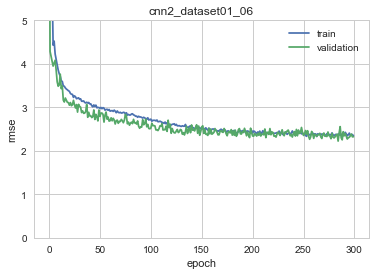

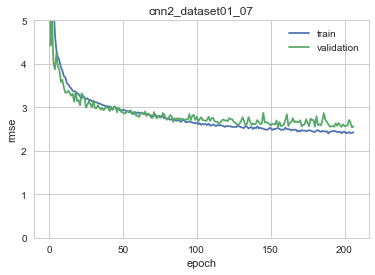

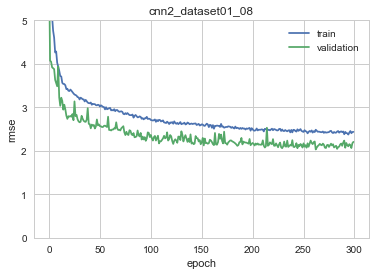

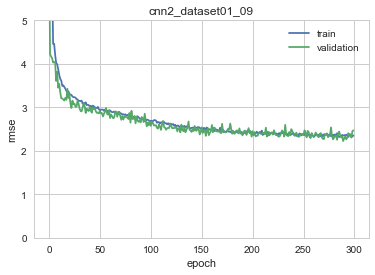

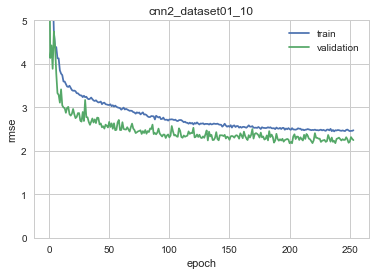

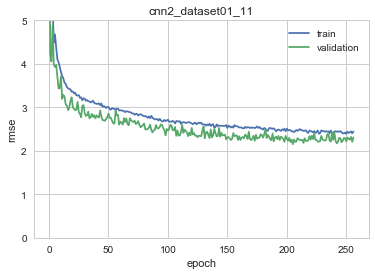

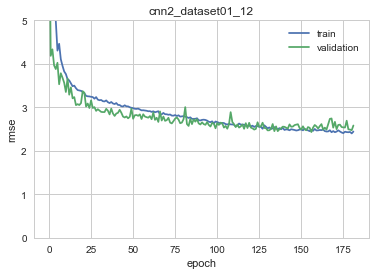

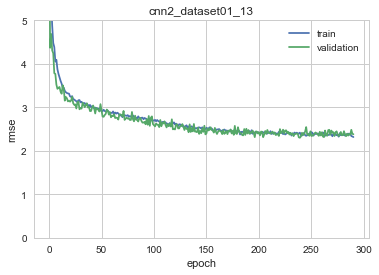

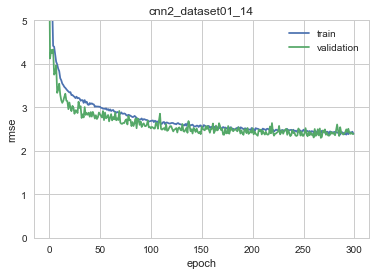

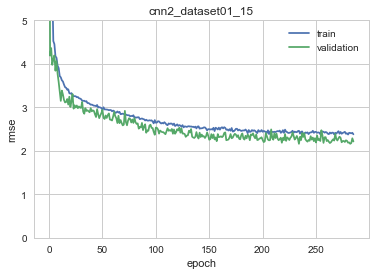

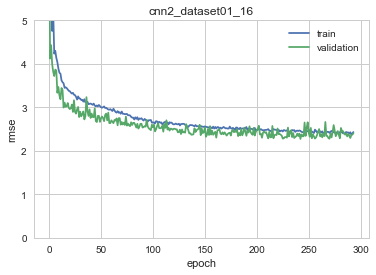

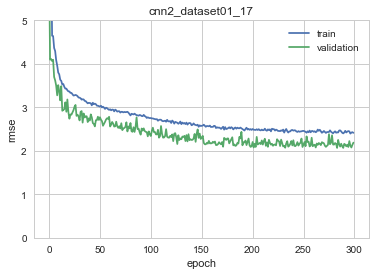

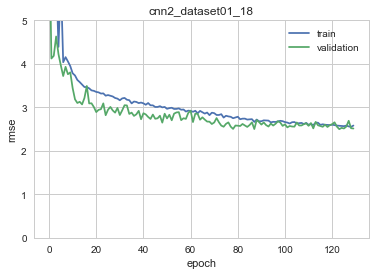

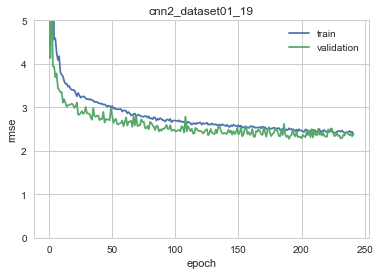

In [21]:
for i in range(20):
    cnn_name = 'cnn2_dataset01_{:02}'.format(i)
    loss_history = pd.read_csv('K/models/model_20171117_1723/cnn2_dataset01/cnn2_dataset01_{:02}.csv'.format(i))
    plt.plot(loss_history['rmse'])
    plt.plot(loss_history['val_rmse'])
    plt.title(cnn_name)
    plt.ylabel('rmse')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    axes = plt.gca()
    axes.set_ylim([0,5])
    plt.show()

# 0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19

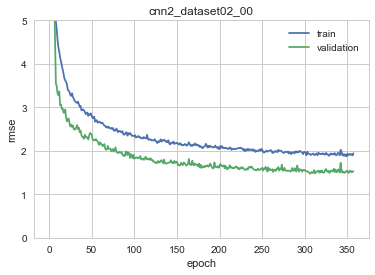

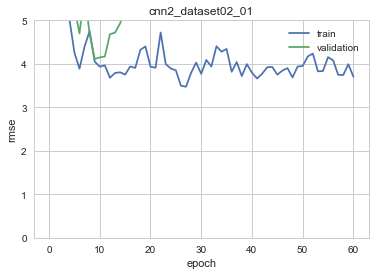

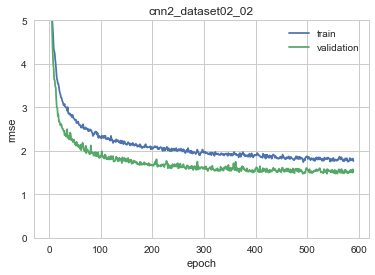

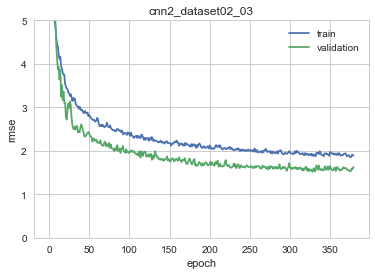

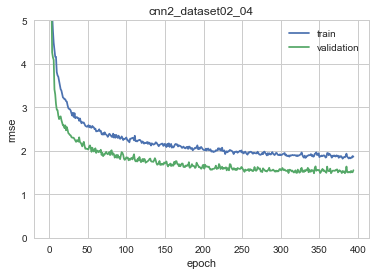

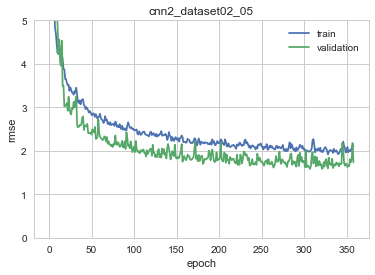

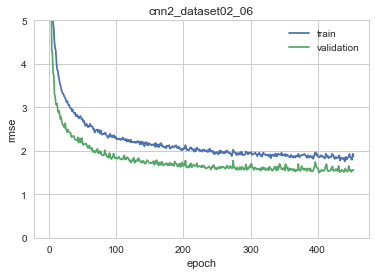

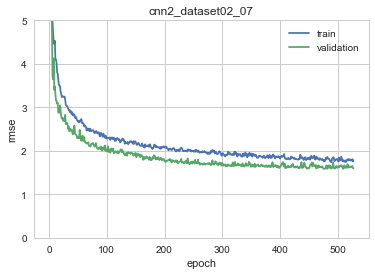

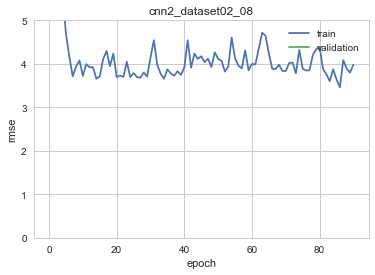

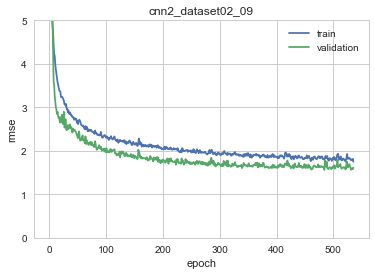

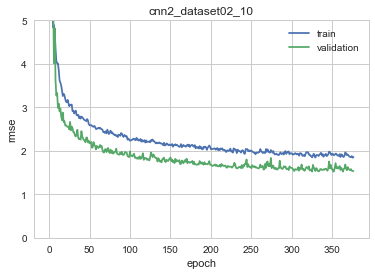

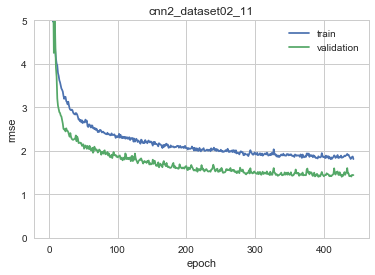

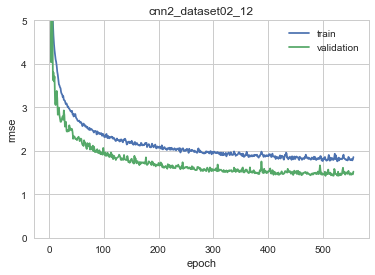

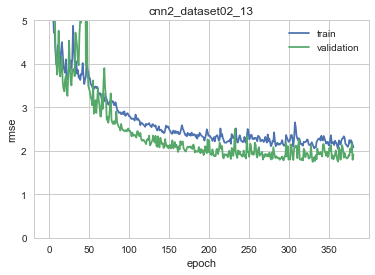

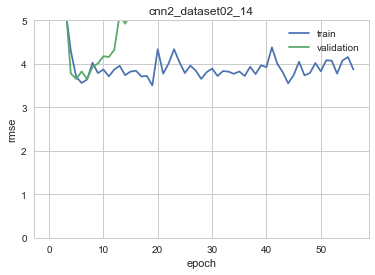

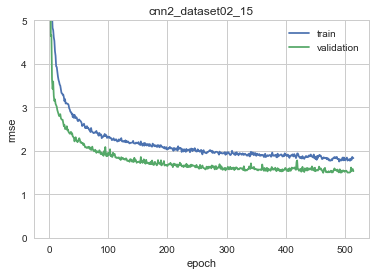

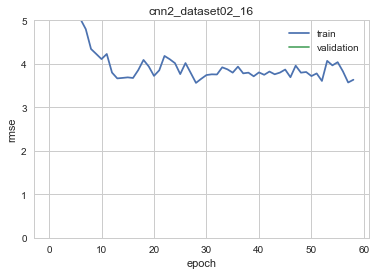

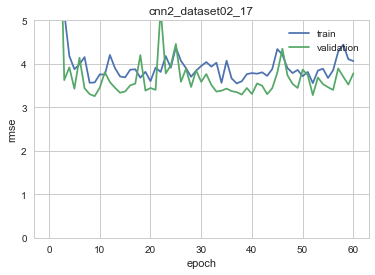

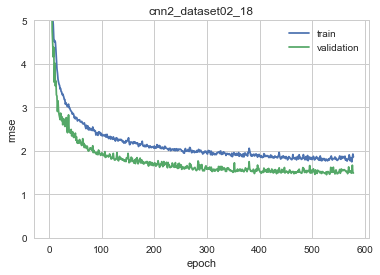

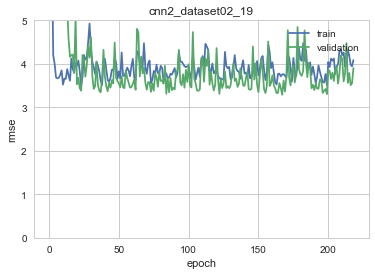

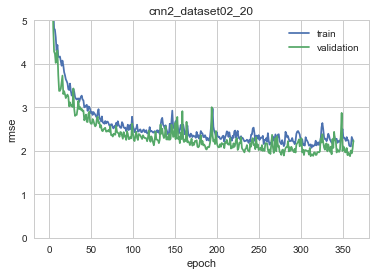

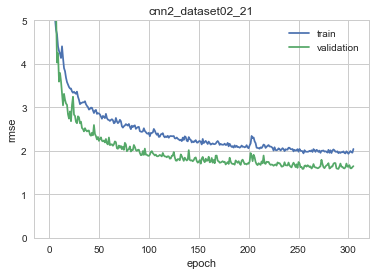

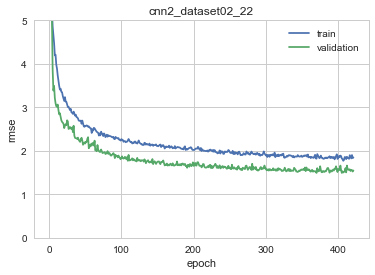

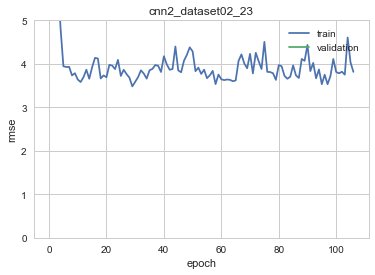

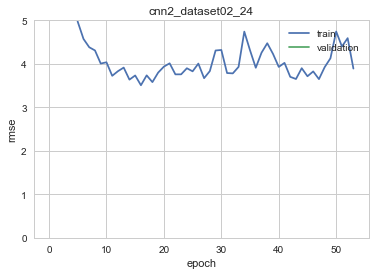

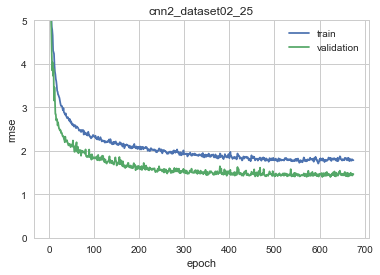

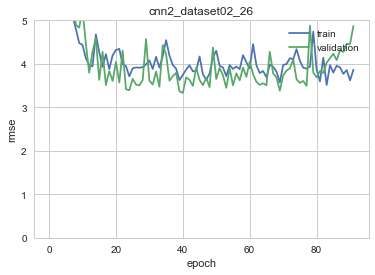

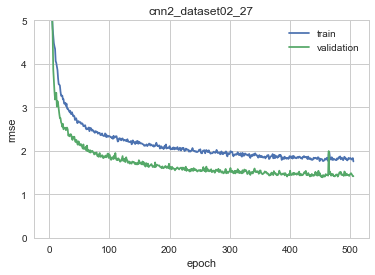

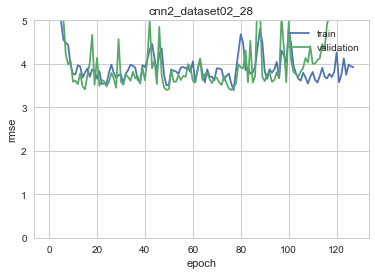

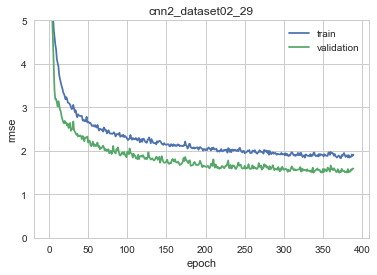

In [23]:
for i in range(30):
    cnn_name = 'cnn2_dataset02_{:02}'.format(i)
    loss_history = pd.read_csv('K/models/model_20171117_1723/cnn2_dataset02/cnn2_dataset02_{:02}.csv'.format(i))
    plt.plot(loss_history['rmse'])
    plt.plot(loss_history['val_rmse'])
    plt.title(cnn_name)
    plt.ylabel('rmse')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    axes = plt.gca()
    axes.set_ylim([0,5])
    plt.show()

# 0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 15, 18, 21, 22, 25, 27, 29

# 앙상블에서 퍼포먼스 좋은 애들 뽑아서 submission_171119.csv 
# 2.14311 on kaggle
* opencv로 얼굴을 찾아서 해보자

### opencv 1.01, 9 parameter

In [ ]:
Y_hat01, Y_hat02 = np.zeros((X_test.shape[0], 8)), np.zeros((X_test.shape[0], 22))
for submodel in model:
    for idx, cnn in enumerate(submodel):
        
        Y_hat = cnn.predict(X_test)
        if Y_hat.shape[1] == 8:
            Y_hat01 += Y_hat
        elif Y_hat.shape[1] == 22:
            Y_hat02 += Y_hat

In [25]:
Y_hat01, Y_hat02 = np.zeros((X_test.shape[0], 8)), np.zeros((X_test.shape[0], 22))
for idx, x in enumerate(X_test):
    y_hat01, y_hat02 = np.zeros((1, 8), np.zeros(1, 22))
    for submodel in model:
        for idx, cnn in enumerate(submodel):
            y_hat = cnn.predict(x)
            if y_hat.shape[1] == 8:
                y_hat01 += yhat
            elif y_hat.shape[1] == 22:
                y_hat02 += yhat
    Y_hat01[idx] = y_hat01
    Y_hat02[idx] = y_hat02

if model[0][0].outputs[0].shape[1] == 8:
    Y_hat01 = Y_hat01 / len(model[0])
if model[1][0].outputs[0].shape[1] == 22:
    Y_hat02 = Y_hat02 / len(model[1])
Y_hat01 = Y_hat01 * 48 + 48
Y_hat02 = Y_hat02 * 48 + 48

(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96, 96, 1)
(96,

In [34]:
temp1 = np.array([1, 2, 3])
temp2 = np.array([4, 5, 6])

In [35]:
np.hstack((temp1, temp2))

array([1, 2, 3, 4, 5, 6])